In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 200)

In [3]:
data_folder = "./data"

year = 2020
so_survey_results_2020 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2020 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2019
so_survey_results_2019 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2019 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2018
so_survey_results_2018 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2018 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2017
so_survey_results_2017 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2017 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"

# Getting a quick look at the 2017 data

In [4]:
df_2017 = pd.read_csv(so_survey_results_2017)
print(df_2017.shape)

(51392, 154)


In [5]:
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_2017.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [181]:
df_2017.Country.value_counts()

United States                     11455
India                              5197
United Kingdom                     4395
Germany                            4143
Canada                             2233
                                  ...  
Mali                                  1
Falkland Islands                      1
British Indian Ocean Territory        1
Vatican City State                    1
Northern Mariana Islands              1
Name: Country, Length: 201, dtype: int64

In [331]:
eastern_eu = ["Russian Federation", "Ukraine", "Poland", "Romania", "Czech Republic", "Hungary", 
              "Belarus", "Bulgaria", "Slovak Republic", "Moldavia", "Turkey", "Georgia", "Azerbaidjan", "Cyprus"]
northern_eu = ["United Kingdom", "Sweden", "Denmark", "Finland", "Norway", "Ireland", 
               "Lithuania", "Latvia", "Estonia", "Iceland"]
western_eu = ["Germany", "France", "Netherlands", "Belgium", "Austria", "Switzerland", "Luxembourg", "Monaco",
             "Lichtenstein"]
southern_eu = ["Italy", "Spain", "Greece", "Portugal", "Serbia", "Croatia", "Bosnia-Herzegovina",
              "Albania", "Macedonia", "Slovenia", "Montenegro", "Malta", "Andorra", "San Marino", "Vatican",
              "Vatican"]
europe_countries = eastern_eu + northern_eu + western_eu + southern_eu

df_2017_eu = df_2017[df_2017.Country.isin(europe_countries)]
df_2017_eu.shape

(15563, 156)

In [330]:
df_2017_eu.Country.value_counts()

United Kingdom        3067
Germany               2805
France                1148
Poland                 913
Netherlands            598
Russian Federation     575
Spain                  543
Italy                  526
Sweden                 441
Switzerland            416
Romania                387
Austria                325
Czech Republic         283
Belgium                280
Hungary                243
Ireland                241
Ukraine                234
Slovenia               224
Greece                 209
Denmark                205
Finland                205
Turkey                 200
Bulgaria               182
Norway                 170
Portugal               167
Serbia                 146
Lithuania              125
Croatia                114
Slovak Republic        110
Latvia                  69
Estonia                 63
Belarus                 51
Moldavia                44
Bosnia-Herzegovina      43
Macedonia               38
Albania                 36
Georgia                 29
L

In [322]:
df_2017_schema = pd.read_csv(so_survey_schema_2017)
df_2017_schema.shape

(154, 2)

In [11]:
df_2017_schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [12]:
df_2017_es.dtypes

Respondent                            int64
Professional                         object
ProgramHobby                         object
Country                              object
University                           object
EmploymentStatus                     object
FormalEducation                      object
MajorUndergrad                       object
HomeRemote                           object
CompanySize                          object
CompanyType                          object
YearsProgram                         object
YearsCodedJob                        object
YearsCodedJobPast                    object
DeveloperType                        object
WebDeveloperType                     object
MobileDeveloperType                  object
NonDeveloperType                     object
CareerSatisfaction                  float64
JobSatisfaction                     float64
ExCoderReturn                        object
ExCoderNotForMe                      object
ExCoderBalance                  

In [13]:
df_2017_es['Year'] = 2017

/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


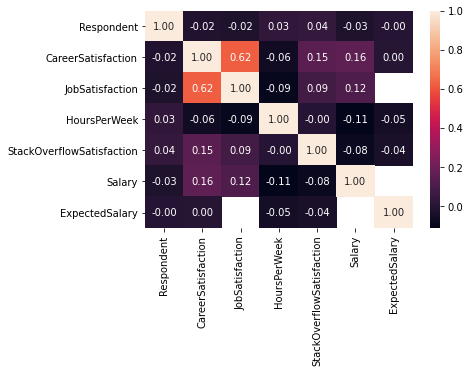

In [303]:
sns.heatmap(df_2017.corr(), annot=True, fmt=".2f")

# Process categorical data

In [278]:
def proces_multiple_tags_cat_col(df, column_name):
    cat_vals_count = df[column_name].value_counts().reset_index()
    cat_vals_count.rename(columns={'index': 'catval', column_name: 'count'}, inplace=True)
    df_exploded = pd.concat([pd.Series(row['count'], row['catval'].split(';')) for _, row in cat_vals_count.iterrows()]).reset_index()
    df_exploded.rename(columns={"index": "catval", 0: "count"}, inplace=True)
    
    # remove extra spaces from categorical values
    df_exploded['catval'] = df_exploded['catval'].apply(lambda x: x.strip())
    return df_exploded

def process_and_plot_multiple_tags_cat_col(df, column_name, plot_title=None, missing_method="dropna", plot=True):
    null_entries = len(df[df[column_name].isnull()])
    print(f"null entries for {column_name}: {null_entries}")
    if null_entries > 0.0:
        # we can drop or add missing values at this point
        if missing_method == "fill_mode":
            col_mode = df[column_name].mode()[0]
            print(f"replacing nulls with mode(most often value) of the column: {col_mode}")
            df[column_name].fillna(col_mode, inplace=True)
        elif missing_method == "dropna":
            print(f"droping nulls of the column: {column_name}")
            df.dropna(subset=[column_name], axis=0, inplace=True)
        null_entries = len(df[df[column_name].isnull()])
        print(f"updated null entries for {column_name}: {null_entries}")
    df_exploded = proces_multiple_tags_cat_col(df, column_name)
    
    df_exploded_grouped = df_exploded.groupby(['catval']).sum().sort_values(["count"], ascending=False).rename(columns={"count" : "total_catvals"}).reset_index()
    print(df_exploded_grouped)
    # plot proportion of cat vals types from total of respondents to the survey
    total_values = df.shape[0] - (null_entries if missing_method=="dropna" else 0)
    if plot:
        ax = (df_exploded_grouped["total_catvals"]/total_values).plot(kind="bar")
        plt.title(plot_title)
        ax.set_xticklabels(df_exploded_grouped["catval"])
        plt.show()
    return df_exploded_grouped, total_values

null entries for DeveloperType: 0
                                               catval  total_catvals
0                                       Web developer          27094
1                      Desktop applications developer           7470
2                                    Mobile developer           5660
3                              Database administrator           3607
4                                   DevOps specialist           3019
5                               Systems administrator           2964
6   Developer with a statistics or mathematics bac...           2918
7             Embedded applications/devices developer           2331
8                                      Data scientist           2051
9                                               Other           2050
10                               Graphics programming           1146
11                        Machine learning specialist            953
12                                   Graphic designer            918


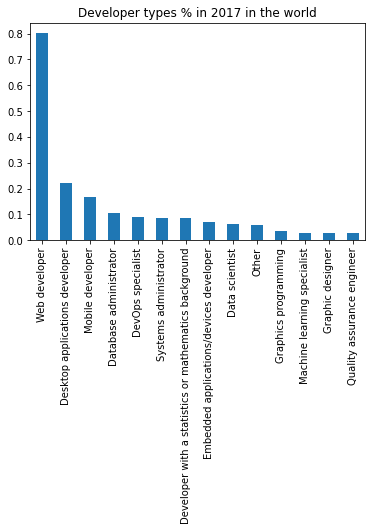

In [262]:
df_exploded_grouped_2017, total_vals_2017 = process_and_plot_multiple_tags_cat_col(df_2017, "DeveloperType", 
                                                                                   "Developer types % in 2017 in the world")

null entries for DeveloperType: 0
                                               catval  total_catvals
0                                       Web developer          12274
1                      Desktop applications developer           3664
2                                    Mobile developer           2404
3                              Database administrator           1566
4                                   DevOps specialist           1436
5                               Systems administrator           1381
6   Developer with a statistics or mathematics bac...           1324
7             Embedded applications/devices developer           1193
8                                      Data scientist            962
9                                               Other            896
10                               Graphics programming            589
11                        Machine learning specialist            439
12                         Quality assurance engineer            383


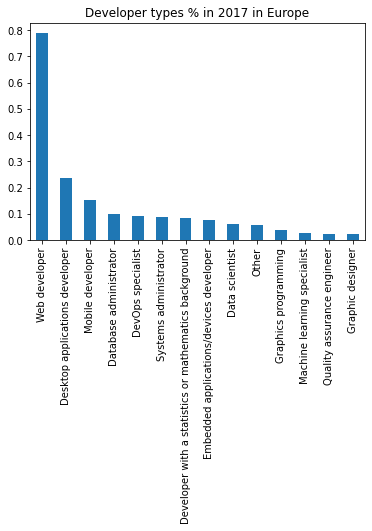

In [333]:
df_exploded_grouped_2017_eu, total_vals_2017_eu = process_and_plot_multiple_tags_cat_col(df_2017_eu, 
                                                                                         "DeveloperType", "Developer types % in 2017 in Europe")


In [334]:
def compare_and_plot_df(df, df_country_specific, country, year, rows_year, rows_country_year):
    merged_df = pd.DataFrame()
    merged_df["catval"] = df["catval"]
    merged_df[f"{year}"] = df["total_catvals"]/rows_year
    merged_df[f"{country} {year}"] = df_country_specific["total_catvals"]/rows_country_year
    merged_df["diff"] = merged_df[f"{year}"] - merged_df[f"{country} {year}"]
    print(merged_df)
    
    merged_df.style.bar(subset=['diff'], align='mid', color=['#d65f5f', '#5fba7d'])
    
    labels = merged_df["catval"]
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, merged_df[f"{year}"], width, label=f"{year}")
    rects2 = ax.bar(x + width/2, merged_df[f"{country} {year}"] , width, label=f"{country} {year}")

#     ax.set_ylabel('')
#     ax.set_title('')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90)
    ax.legend()

                                               catval      2017  Europe 2017  \
0                                       Web developer  0.802286     0.788665   
1                      Desktop applications developer  0.221196     0.235430   
2                                    Mobile developer  0.167599     0.154469   
3                              Database administrator  0.106808     0.100623   
4                                   DevOps specialist  0.089396     0.092270   
5                               Systems administrator  0.087768     0.088736   
6   Developer with a statistics or mathematics bac...  0.086405     0.085074   
7             Embedded applications/devices developer  0.069024     0.076656   
8                                      Data scientist  0.060733     0.061813   
9                                               Other  0.060703     0.057572   
10                               Graphics programming  0.033934     0.037846   
11                        Machine learni

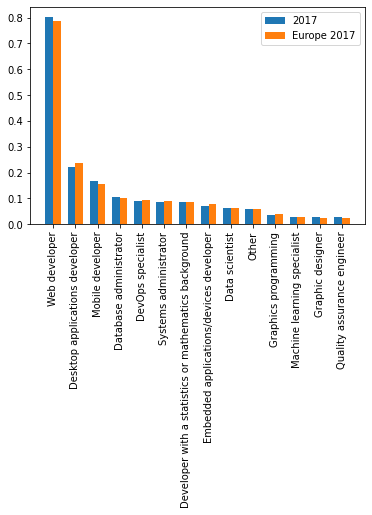

In [335]:
compare_and_plot_df(df_exploded_grouped_2017, df_exploded_grouped_2017_es, "Europe", 2017, 
                    total_vals_2017, total_vals_2017_eu)

In [336]:
def process_and_compare_col_global_local(df, df_country, column_name, year, country):
    print(f"processing yearly data for year {year} and {column_name}")
    df_exploded_grouped, total_vals = process_and_plot_multiple_tags_cat_col(df, column_name, f"{column_name} % in {year} in the world")
    print(f"processing yearly data for year {year} and {column_name} in {country}")
    df_exploded_grouped__country_specific, total_vals_country = process_and_plot_multiple_tags_cat_col(df_country, column_name, f"{column_name} % in {year} in {country}")
    compare_and_plot_df(df_exploded_grouped, df_exploded_grouped__country_specific, country, year, total_vals, total_vals_country)
    return df_exploded_grouped, df_exploded_grouped__country_specific

processing yearly data for year 2017 and HaveWorkedLanguage
null entries for HaveWorkedLanguage: 0
            catval  total_catvals
0       JavaScript          21245
1              SQL          17401
2             Java          13209
3               C#          11534
4           Python          10756
5              PHP           9294
6              C++           7376
7                C           6271
8       TypeScript           3203
9             Ruby           3082
10           Swift           2154
11     Objective-C           2118
12          VB.NET           1976
13        Assembly           1591
14               R           1498
15          Matlab           1439
16              Go           1432
17            Perl           1402
18             VBA           1376
19           Scala           1223
20    CoffeeScript           1104
21          Groovy           1089
22             Lua            937
23  Visual Basic 6            907
24         Haskell            595
25              F

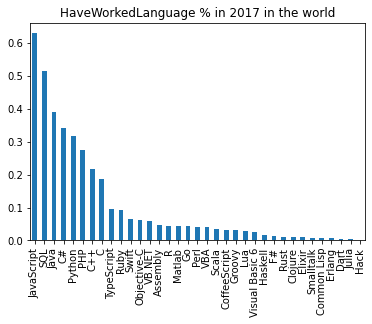

processing yearly data for year 2017 and HaveWorkedLanguage in Europe
null entries for HaveWorkedLanguage: 0
            catval  total_catvals
0       JavaScript           9663
1              SQL           7964
2             Java           6022
3               C#           5403
4           Python           4736
5              PHP           4516
6              C++           3488
7                C           2841
8       TypeScript           1613
9             Ruby           1244
10     Objective-C            876
11           Swift            865
12          VB.NET            768
13        Assembly            712
14          Matlab            677
15             VBA            671
16              Go            653
17               R            648
18           Scala            602
19            Perl            596
20          Groovy            533
21    CoffeeScript            527
22             Lua            480
23  Visual Basic 6            337
24         Haskell            327
25     

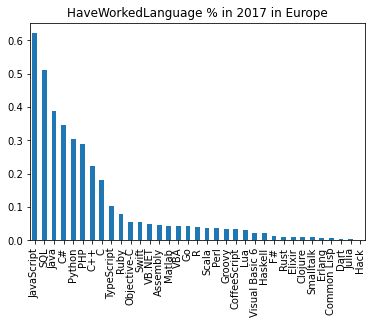

            catval      2017  Europe 2017      diff
0       JavaScript  0.629090     0.620896  0.008194
1              SQL  0.515265     0.511727  0.003538
2             Java  0.391134     0.386943  0.004191
3               C#  0.341536     0.347170 -0.005634
4           Python  0.318498     0.304312  0.014187
5              PHP  0.275207     0.290175 -0.014969
6              C++  0.218412     0.224121 -0.005709
7                C  0.185692     0.182548  0.003144
8       TypeScript  0.094845     0.103643 -0.008799
9             Ruby  0.091262     0.079933  0.011329
10           Swift  0.063783     0.056287  0.007495
11     Objective-C  0.062717     0.055581  0.007136
12          VB.NET  0.058512     0.049348  0.009164
13        Assembly  0.047111     0.045750  0.001362
14               R  0.044358     0.043501  0.000857
15          Matlab  0.042611     0.043115 -0.000505
16              Go  0.042403     0.041958  0.000445
17            Perl  0.041515     0.041637 -0.000122
18          

(            catval  total_catvals
 0       JavaScript          21245
 1              SQL          17401
 2             Java          13209
 3               C#          11534
 4           Python          10756
 5              PHP           9294
 6              C++           7376
 7                C           6271
 8       TypeScript           3203
 9             Ruby           3082
 10           Swift           2154
 11     Objective-C           2118
 12          VB.NET           1976
 13        Assembly           1591
 14               R           1498
 15          Matlab           1439
 16              Go           1432
 17            Perl           1402
 18             VBA           1376
 19           Scala           1223
 20    CoffeeScript           1104
 21          Groovy           1089
 22             Lua            937
 23  Visual Basic 6            907
 24         Haskell            595
 25              F#            412
 26            Rust            383
 27         Clojure 

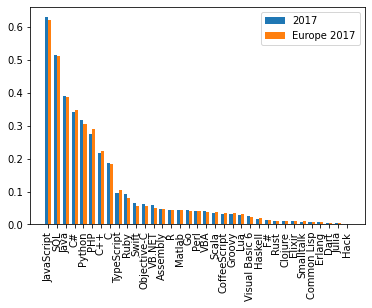

In [337]:
process_and_compare_col_global_local(df_2017, df_2017_eu, "HaveWorkedLanguage", year=2017, country="Europe")

## What do people wanted to work in actually

processing yearly data for year 2017 and WantWorkLanguage
null entries for WantWorkLanguage: 0
            catval  total_catvals
0       JavaScript          16327
1           Python          12570
2              SQL          11217
3               C#          10187
4             Java           9988
5              C++           7647
6               Go           5770
7       TypeScript           5692
8              PHP           5365
9                C           4841
10           Swift           4530
11            Ruby           3966
12           Scala           3122
13            Rust           2718
14               R           2628
15         Haskell           2306
16              F#           2034
17        Assembly           1923
18     Objective-C           1844
19          Elixir           1565
20         Clojure           1308
21             Lua           1117
22            Perl           1089
23          Erlang           1053
24    CoffeeScript           1032
25          Matlab   

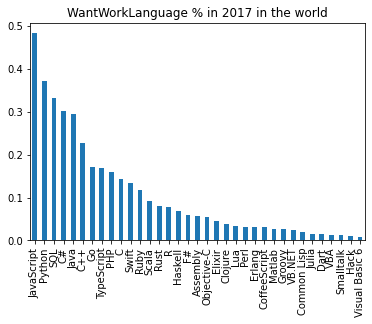

processing yearly data for year 2017 and WantWorkLanguage in Europe
null entries for WantWorkLanguage: 0
            catval  total_catvals
0       JavaScript           7192
1           Python           5205
2              SQL           5018
3               C#           4772
4             Java           4495
5              C++           3712
6       TypeScript           2736
7              PHP           2536
8               Go           2497
9                C           2165
10           Swift           1723
11            Ruby           1479
12           Scala           1424
13            Rust           1328
14         Haskell           1124
15              F#           1002
16               R            959
17        Assembly            850
18          Elixir            725
19     Objective-C            662
20         Clojure            565
21             Lua            524
22          Erlang            493
23    CoffeeScript            445
24            Perl            423
25         

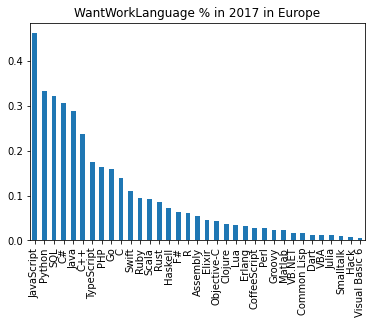

            catval      2017  Europe 2017      diff
0       JavaScript  0.483462     0.462122  0.021340
1           Python  0.372213     0.334447  0.037766
2              SQL  0.332149     0.322431  0.009717
3               C#  0.301649     0.306625 -0.004975
4             Java  0.295757     0.288826  0.006931
5              C++  0.226437     0.238514 -0.012078
6               Go  0.170857     0.175802 -0.004945
7       TypeScript  0.168547     0.162951  0.005596
8              PHP  0.158864     0.160445 -0.001581
9                C  0.143348     0.139112  0.004236
10           Swift  0.134139     0.110711  0.023427
11            Ruby  0.117438     0.095033  0.022405
12           Scala  0.092446     0.091499  0.000947
13            Rust  0.080483     0.085331 -0.004847
14               R  0.077818     0.072223  0.005596
15         Haskell  0.068283     0.064383  0.003900
16              F#  0.060229     0.061621 -0.001391
17        Assembly  0.056942     0.054617  0.002326
18     Objec

(            catval  total_catvals
 0       JavaScript          16327
 1           Python          12570
 2              SQL          11217
 3               C#          10187
 4             Java           9988
 5              C++           7647
 6               Go           5770
 7       TypeScript           5692
 8              PHP           5365
 9                C           4841
 10           Swift           4530
 11            Ruby           3966
 12           Scala           3122
 13            Rust           2718
 14               R           2628
 15         Haskell           2306
 16              F#           2034
 17        Assembly           1923
 18     Objective-C           1844
 19          Elixir           1565
 20         Clojure           1308
 21             Lua           1117
 22            Perl           1089
 23          Erlang           1053
 24    CoffeeScript           1032
 25          Matlab            931
 26          Groovy            866
 27          VB.NET 

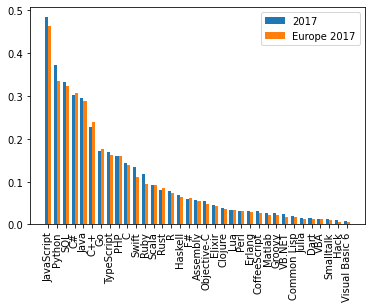

In [339]:
process_and_compare_col_global_local(df_2017, df_2017_eu, "WantWorkLanguage", year=2017, country="Europe")

## How many people actually work with the language they want?

In [340]:
def check_lang_matching(row):
    worked_langs = sorted([lang.strip() for lang in row["HaveWorkedLanguage"].split(";")])
    want_to_work_langs = sorted([lang.strip() for lang in row["WantWorkLanguage"].split(";")])
    lang_intersect = sorted(list(set(worked_langs) & set(want_to_work_langs)))
    if lang_intersect == worked_langs:
        return "Perfect match"
    elif len(lang_intersect) == 0:
        return "No match"
    else:
        return "Some match"
    
df_2017["LangSatisfaction"] = df_2017.apply(check_lang_matching, axis=1)

In [341]:
df_2017.LangSatisfaction.value_counts()

Some match       16409
Perfect match    11404
No match          5958
Name: LangSatisfaction, dtype: int64

In [342]:
def check_lang_matching(row):
    worked_langs = sorted([lang.strip() for lang in row["HaveWorkedLanguage"].split(";")])
    want_to_work_langs = sorted([lang.strip() for lang in row["WantWorkLanguage"].split(";")])
    lang_intersect = sorted(list(set(worked_langs) & set(want_to_work_langs)))
    joined_intersect = ";".join([l for l in lang_intersect if l])
    return joined_intersect
df_2017["LangMatched"] = df_2017.apply(check_lang_matching, axis=1)

## What is the programming language(s) that gives most satisfaction ?

null entries for LangMatched: 0
            catval  total_catvals
0       JavaScript          13806
1              SQL          10094
2               C#           7766
3           Python           7340
4             Java           7337
5                            5958
6              PHP           4256
7              C++           4244
8                C           2906
9       TypeScript           2236
10            Ruby           1612
11           Swift           1514
12              Go            985
13               R            815
14           Scala            784
15     Objective-C            749
16        Assembly            590
17            Perl            541
18          VB.NET            518
19          Groovy            443
20          Matlab            434
21             Lua            355
22         Haskell            354
23             VBA            308
24            Rust            304
25              F#            257
26    CoffeeScript            248
27          Elix

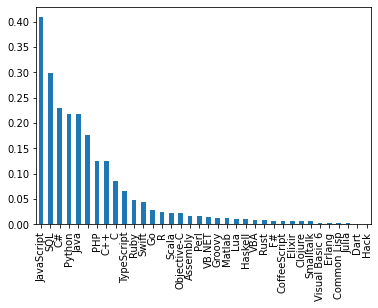

(            catval  total_catvals
 0       JavaScript          13806
 1              SQL          10094
 2               C#           7766
 3           Python           7340
 4             Java           7337
 5                            5958
 6              PHP           4256
 7              C++           4244
 8                C           2906
 9       TypeScript           2236
 10            Ruby           1612
 11           Swift           1514
 12              Go            985
 13               R            815
 14           Scala            784
 15     Objective-C            749
 16        Assembly            590
 17            Perl            541
 18          VB.NET            518
 19          Groovy            443
 20          Matlab            434
 21             Lua            355
 22         Haskell            354
 23             VBA            308
 24            Rust            304
 25              F#            257
 26    CoffeeScript            248
 27          Elixir 

In [343]:
process_and_plot_multiple_tags_cat_col(df_2017[df_2017["LangMatched"] != "No Match"], "LangMatched")

In [344]:
proces_multiple_tags_cat_col(df_2017, "WantWorkLanguage")

,catval,count
0,JavaScript,642
1,Python,556
2,Java,544
3,C#,475
4,C#,444
5,JavaScript,444
6,SQL,444
7,Java,332
8,JavaScript,332
9,C#,326


In [345]:
df_2017.CareerSatisfaction.value_counts()

8.0     7928
7.0     6582
9.0     4007
10.0    3490
6.0     3204
5.0     1893
4.0      855
3.0      677
2.0      302
0.0      209
1.0       98
Name: CareerSatisfaction, dtype: int64

In [346]:
df_2017.JobSatisfaction.value_counts()

8.0     6318
7.0     5626
9.0     4006
6.0     3238
10.0    2657
5.0     2461
4.0     1265
3.0     1116
2.0      614
0.0      302
1.0      238
Name: JobSatisfaction, dtype: int64

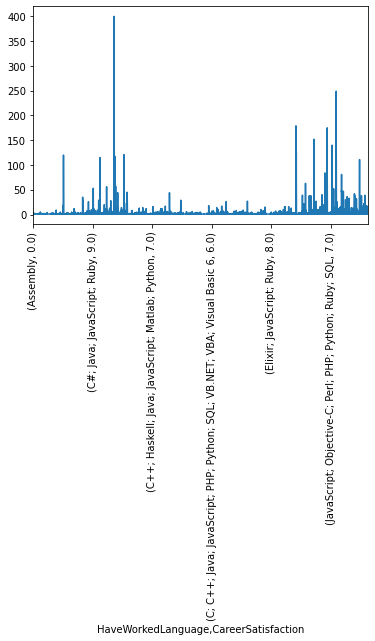

In [311]:
df_2017.groupby(['HaveWorkedLanguage', 'CareerSatisfaction']).count()['Respondent'].plot(rot=90)

## Process Frameworks 

processing yearly data for year 2017 and HaveWorkedFramework
null entries for HaveWorkedFramework: 0
      catval  total_catvals
0  .NET Core          21341
1    Node.js           8745
2  AngularJS           8204
3      React           3663
4    Cordova           2023
5   Firebase           1793
6    Xamarin           1484
7     Hadoop           1045
8      Spark            869


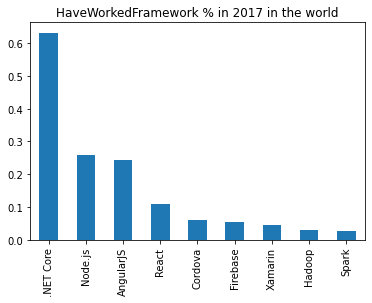

processing yearly data for year 2017 and HaveWorkedFramework in Europe
null entries for HaveWorkedFramework: 0
      catval  total_catvals
0  .NET Core           9959
1    Node.js           3947
2  AngularJS           3598
3      React           1618
4    Cordova            937
5    Xamarin            678
6   Firebase            625
7     Hadoop            409
8      Spark            350


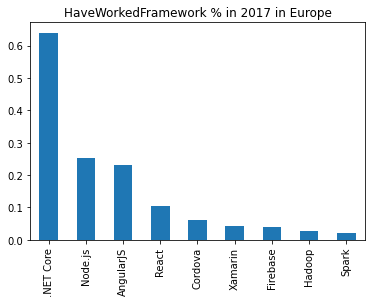

      catval      2017  Europe 2017      diff
0  .NET Core  0.631933     0.639915 -0.007982
1    Node.js  0.258950     0.253614  0.005336
2  AngularJS  0.242930     0.231189  0.011741
3      React  0.108466     0.103965  0.004501
4    Cordova  0.059903     0.060207 -0.000303
5   Firebase  0.053093     0.043565  0.009528
6    Xamarin  0.043943     0.040159  0.003784
7     Hadoop  0.030944     0.026280  0.004663
8      Spark  0.025732     0.022489  0.003243


(      catval  total_catvals
 0  .NET Core          21341
 1    Node.js           8745
 2  AngularJS           8204
 3      React           3663
 4    Cordova           2023
 5   Firebase           1793
 6    Xamarin           1484
 7     Hadoop           1045
 8      Spark            869,       catval  total_catvals
 0  .NET Core           9959
 1    Node.js           3947
 2  AngularJS           3598
 3      React           1618
 4    Cordova            937
 5    Xamarin            678
 6   Firebase            625
 7     Hadoop            409
 8      Spark            350)

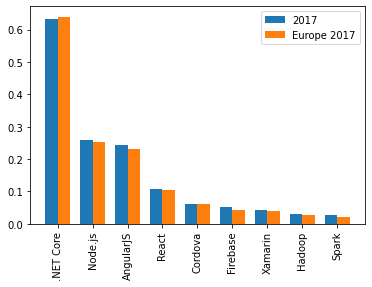

In [347]:
process_and_compare_col_global_local(df_2017, df_2017_eu, "HaveWorkedFramework", year=2017, country="Europe")

# Process 2018 Data

In [349]:
def process_yearly_data(file_path, year, country, columns_index=None):
    print(f"processing data for year {year} from {file_path}")
    df = pd.read_csv(file_path)
    print('original data shape: ', df.shape)
    df['Year'] = year
    print('original data shape + year: ', df.shape)
    if country == 'Europe':
        df_country_specific = df[df.Country.isin(europe_countries)]
    else:
        df_country_specific = df[df.Country == country]
    print('country specific data shape: ', df_country_specific.shape)
    if columns_index is not None:
        print('old column index: ', columns_index.tolist())
        print('old columns index len: ', len(columns_index))
        print('new columns index len: ', len(df_country_specific.columns))
        print('new column index: ', df_country_specific.columns.tolist())    
        diff_old_new = columns_index.difference(df_country_specific.columns)
        print('extra old columns index len: ', len(diff_old_new))
        print('extra old columns index ', diff_old_new.tolist())
        diff_new_old = df_country_specific.columns.difference(columns_index)
        print('extra new columns index len: ', len(diff_new_old))
        print('extra new columns index ', diff_new_old.tolist())
        new_column_index = columns_index.intersection(df_country_specific.columns)
        print('intersection columns index len: ', len(new_column_index))
        print('intersection columns index: ', new_column_index.tolist())


    return df, df_country_specific, new_column_index

In [350]:
cols_intersect = df_2017_eu.columns

In [351]:
df_2018, df_2018_eu, cols_intersect = process_yearly_data(so_survey_results_2018, 2018, 'Europe', cols_intersect)

processing data for year 2018 from ./data/developer_survey_2018/survey_results_public.csv


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


original data shape:  (98855, 129)
original data shape + year:  (98855, 130)
country specific data shape:  (39390, 130)
old column index:  ['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJo

## Process Developer types in 2018

processing yearly data for year 2018 and DevType
null entries for DevType: 6757
droping nulls of the column: DevType
updated null entries for DevType: 0
                                           catval  total_catvals
0                              Back-end developer          53300
1                            Full-stack developer          44353
2                             Front-end developer          34822
3                                Mobile developer          18804
4    Desktop or enterprise applications developer          15807
5                                         Student          15732
6                          Database administrator          13216
7                                        Designer          12019
8                            System administrator          10375
9                               DevOps specialist           9549
10                       Data or business analyst           7559
11  Data scientist or machine learning specialist           7088
12

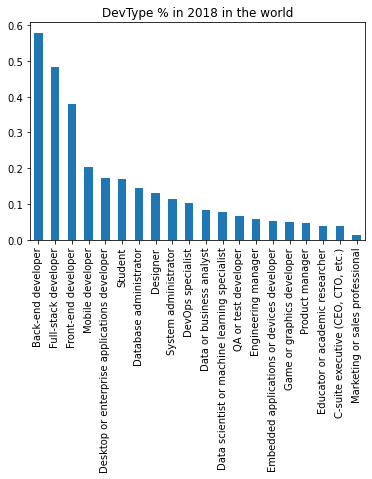

processing yearly data for year 2018 and DevType in Europe
null entries for DevType: 2311
droping nulls of the column: DevType
updated null entries for DevType: 0


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                           catval  total_catvals
0                              Back-end developer          22003
1                            Full-stack developer          17528
2                             Front-end developer          13542
3    Desktop or enterprise applications developer           7161
4                                Mobile developer           6666
5                                         Student           6599
6                          Database administrator           5380
7                            System administrator           4628
8                               DevOps specialist           4241
9                                        Designer           4139
10  Data scientist or machine learning specialist           2833
11                       Data or business analyst           2700
12                           QA or test developer           2324
13     Embedded applications or devices developer           2255
14                     Ga

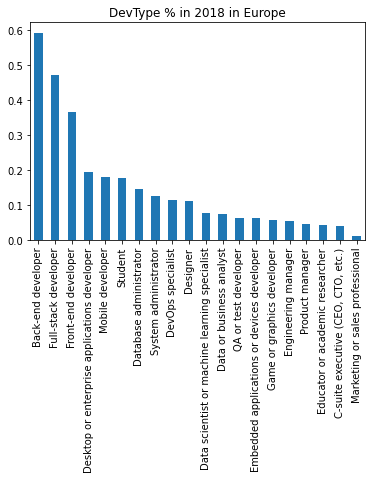

                                           catval      2018  Europe 2018  \
0                              Back-end developer  0.578731     0.593409   
1                            Full-stack developer  0.481585     0.472720   
2                             Front-end developer  0.378097     0.365220   
3                                Mobile developer  0.204174     0.193128   
4    Desktop or enterprise applications developer  0.171632     0.179778   
5                                         Student  0.170818     0.177971   
6                          Database administrator  0.143499     0.145096   
7                                        Designer  0.130502     0.124815   
8                            System administrator  0.112652     0.114377   
9                               DevOps specialist  0.103683     0.111627   
10                       Data or business analyst  0.082076     0.076404   
11  Data scientist or machine learning specialist  0.076961     0.072817   
12          

(                                           catval  total_catvals
 0                              Back-end developer          53300
 1                            Full-stack developer          44353
 2                             Front-end developer          34822
 3                                Mobile developer          18804
 4    Desktop or enterprise applications developer          15807
 5                                         Student          15732
 6                          Database administrator          13216
 7                                        Designer          12019
 8                            System administrator          10375
 9                               DevOps specialist           9549
 10                       Data or business analyst           7559
 11  Data scientist or machine learning specialist           7088
 12                           QA or test developer           6194
 13                            Engineering manager           5256
 14     Em

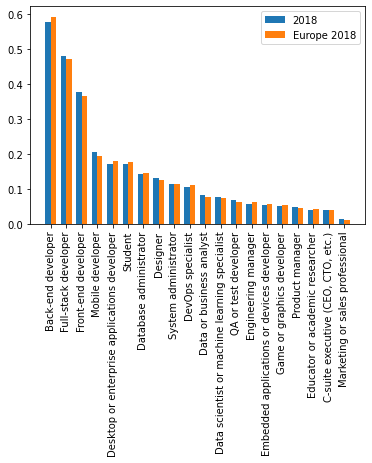

In [352]:
process_and_compare_col_global_local(df_2018, df_2018_eu, "DevType", year=2018, country="Europe")

## Process Languages worked in 2018

processing yearly data for year 2018 and LanguageWorkedWith
null entries for LanguageWorkedWith: 15233
droping nulls of the column: LanguageWorkedWith
updated null entries for LanguageWorkedWith: 0
                  catval  total_catvals
0             JavaScript          54019
1                   HTML          52899
2                    CSS          50342
3                    SQL          44124
4                   Java          35016
5             Bash/Shell          30646
6                 Python          29635
7                     C#          26583
8                    PHP          23776
9                    C++          19401
10                     C          17605
11            TypeScript          13540
12                  Ruby           7802
13                 Swift           6235
14              Assembly           5589
15                    Go           5445
16           Objective-C           5444
17                VB.NET           5164
18                     R           4669
19

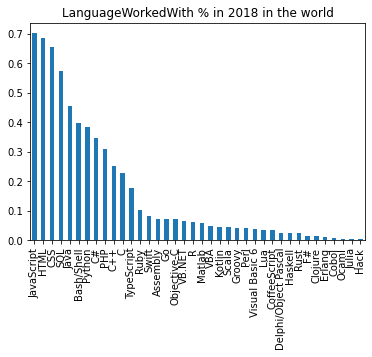

processing yearly data for year 2018 and LanguageWorkedWith in Europe
null entries for LanguageWorkedWith: 5905
droping nulls of the column: LanguageWorkedWith
updated null entries for LanguageWorkedWith: 0


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                  catval  total_catvals
0             JavaScript          21534
1                   HTML          20973
2                    CSS          19955
3                    SQL          17866
4                   Java          13951
5             Bash/Shell          13434
6                 Python          11945
7                     C#          11352
8                    PHP           9883
9                    C++           7956
10                     C           6746
11            TypeScript           5787
12                  Ruby           2718
13              Assembly           2262
14                 Swift           2225
15                    Go           2185
16                Matlab           1967
17           Objective-C           1922
18                     R           1836
19                VB.NET           1744
20                   VBA           1620
21                 Scala           1591
22                Kotlin           1562
23                Groovy           1518


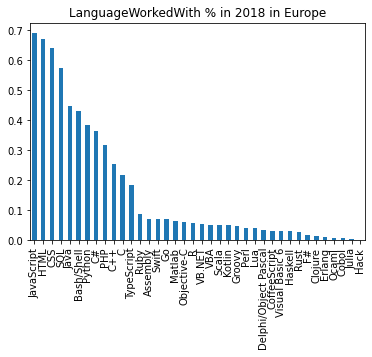

                  catval      2018  Europe 2018      diff
0             JavaScript  0.702778     0.690768  0.012010
1                   HTML  0.688207     0.672772  0.015434
2                    CSS  0.654940     0.640117  0.014824
3                    SQL  0.574045     0.573106  0.000940
4                   Java  0.455552     0.447520  0.008032
5             Bash/Shell  0.398699     0.430936 -0.032237
6                 Python  0.385546     0.383172  0.002374
7                     C#  0.345840     0.364150 -0.018310
8                    PHP  0.309322     0.317027 -0.007705
9                    C++  0.252404     0.255213 -0.002809
10                     C  0.229038     0.216398  0.012640
11            TypeScript  0.176153     0.185635 -0.009482
12                  Ruby  0.101503     0.087188  0.014315
13                 Swift  0.081116     0.072560  0.008556
14              Assembly  0.072712     0.071374  0.001338
15                    Go  0.070838     0.070090  0.000748
16           O

(                  catval  total_catvals
 0             JavaScript          54019
 1                   HTML          52899
 2                    CSS          50342
 3                    SQL          44124
 4                   Java          35016
 5             Bash/Shell          30646
 6                 Python          29635
 7                     C#          26583
 8                    PHP          23776
 9                    C++          19401
 10                     C          17605
 11            TypeScript          13540
 12                  Ruby           7802
 13                 Swift           6235
 14              Assembly           5589
 15                    Go           5445
 16           Objective-C           5444
 17                VB.NET           5164
 18                     R           4669
 19                Matlab           4430
 20                   VBA           3656
 21                Kotlin           3475
 22                 Scala           3363
 23             

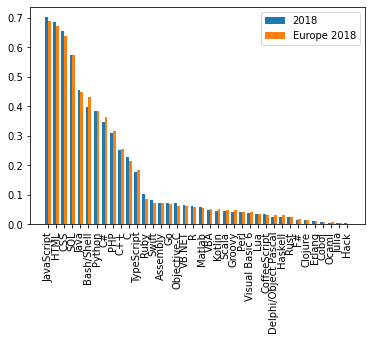

In [353]:
process_and_compare_col_global_local(df_2018, df_2018_eu, "LanguageWorkedWith", year=2018, country="Europe")

## Process Framework worked in 2018

processing yearly data for year 2018 and FrameworkWorkedWith
null entries for FrameworkWorkedWith: 25910
droping nulls of the column: FrameworkWorkedWith
updated null entries for FrameworkWorkedWith: 0
           catval  total_catvals
0         Node.js          25324
1         Angular          18873
2           React          14222
3       .NET Core          13850
4          Spring           8980
5          Django           6624
6         Cordova           4333
7      TensorFlow           3949
8         Xamarin           3735
9           Spark           2424
10         Hadoop           2395
11  Torch/PyTorch            837


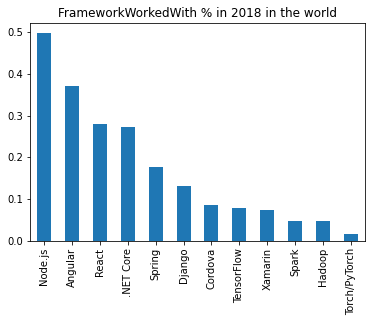

processing yearly data for year 2018 and FrameworkWorkedWith in Europe
null entries for FrameworkWorkedWith: 10678
droping nulls of the column: FrameworkWorkedWith
updated null entries for FrameworkWorkedWith: 0


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


           catval  total_catvals
0         Node.js           9784
1         Angular           7164
2       .NET Core           5810
3           React           5332
4          Spring           3959
5          Django           2413
6         Cordova           1608
7         Xamarin           1585
8      TensorFlow           1497
9           Spark            933
10         Hadoop            808
11  Torch/PyTorch            287


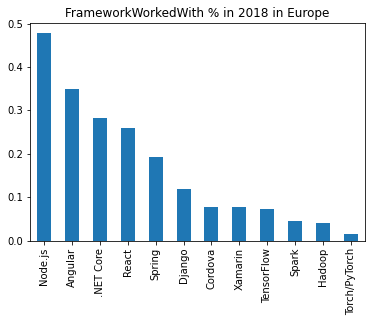

           catval      2018  Europe 2018      diff
0         Node.js  0.496988     0.477361  0.019626
1         Angular  0.370386     0.349532  0.020854
2           React  0.279109     0.283470 -0.004361
3       .NET Core  0.271808     0.260148  0.011660
4          Spring  0.176234     0.193160 -0.016926
5          Django  0.129997     0.117730  0.012267
6         Cordova  0.085036     0.078454  0.006581
7      TensorFlow  0.077500     0.077332  0.000168
8         Xamarin  0.073300     0.073039  0.000261
9           Spark  0.047571     0.045521  0.002050
10         Hadoop  0.047002     0.039422  0.007580
11  Torch/PyTorch  0.016426     0.014003  0.002424


(           catval  total_catvals
 0         Node.js          25324
 1         Angular          18873
 2           React          14222
 3       .NET Core          13850
 4          Spring           8980
 5          Django           6624
 6         Cordova           4333
 7      TensorFlow           3949
 8         Xamarin           3735
 9           Spark           2424
 10         Hadoop           2395
 11  Torch/PyTorch            837,            catval  total_catvals
 0         Node.js           9784
 1         Angular           7164
 2       .NET Core           5810
 3           React           5332
 4          Spring           3959
 5          Django           2413
 6         Cordova           1608
 7         Xamarin           1585
 8      TensorFlow           1497
 9           Spark            933
 10         Hadoop            808
 11  Torch/PyTorch            287)

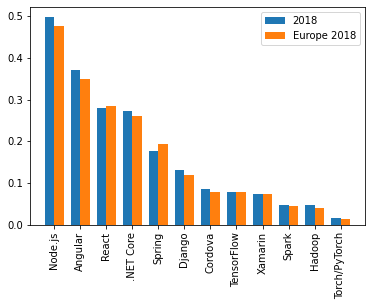

In [354]:
process_and_compare_col_global_local(df_2018, df_2018_eu, "FrameworkWorkedWith", year=2018, country="Europe")

# Process 2019 Data

In [355]:
df_2019, df_2019_eu, cols_intersect = process_yearly_data(so_survey_results_2019, 2019, 'Europe', cols_intersect)

processing data for year 2019 from ./data/developer_survey_2019/survey_results_public.csv
original data shape:  (88883, 85)
original data shape + year:  (88883, 86)
country specific data shape:  (36468, 86)
old column index:  ['Respondent', 'Country', 'FormalEducation', 'CompanySize', 'CareerSatisfaction', 'JobSatisfaction', 'LastNewJob', 'Currency', 'EducationTypes', 'SelfTaughtTypes', 'TimeAfterBootcamp', 'IDE', 'Methodology', 'VersionControl', 'CheckInCode', 'Gender', 'Salary']
old columns index len:  17
new columns index len:  86
new column index:  ['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 

processing yearly data for year 2019 and DevType
null entries for DevType: 7548
droping nulls of the column: DevType
updated null entries for DevType: 0
                                           catval  total_catvals
0                           Developer, full-stack          42222
1                             Developer, back-end          40665
2                            Developer, front-end          26649
3   Developer, desktop or enterprise applications          17316
4                               Developer, mobile          14698
5                                         Student          11921
6                          Database administrator           9520
7                                        Designer           9182
8                            System administrator           8929
9                               DevOps specialist           8862
10    Developer, embedded applications or devices           7248
11  Data scientist or machine learning specialist           6460
12

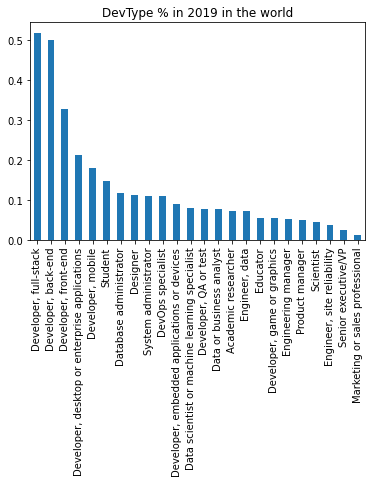

processing yearly data for year 2019 and DevType in Europe
null entries for DevType: 3092
droping nulls of the column: DevType
updated null entries for DevType: 0


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                           catval  total_catvals
0                             Developer, back-end          17170
1                           Developer, full-stack          16638
2                            Developer, front-end          10270
3   Developer, desktop or enterprise applications           7411
4                               Developer, mobile           5441
5                                         Student           4614
6                               DevOps specialist           4060
7                            System administrator           3898
8                          Database administrator           3771
9     Developer, embedded applications or devices           3106
10                                       Designer           3071
11  Data scientist or machine learning specialist           2562
12                          Developer, QA or test           2513
13                                 Engineer, data           2286
14                       

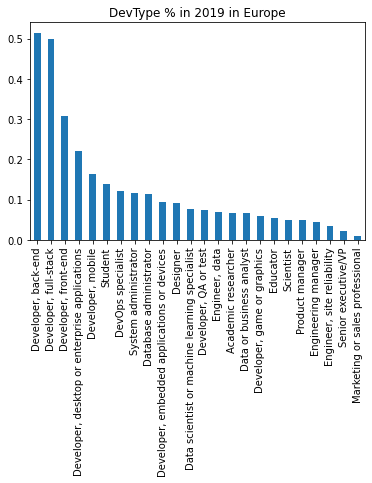

                                           catval      2019  Europe 2019  \
0                           Developer, full-stack  0.519112     0.514442   
1                             Developer, back-end  0.499969     0.498502   
2                            Developer, front-end  0.327645     0.307706   
3   Developer, desktop or enterprise applications  0.212897     0.222046   
4                               Developer, mobile  0.180709     0.163021   
5                                         Student  0.146567     0.138243   
6                          Database administrator  0.117047     0.121644   
7                                        Designer  0.112891     0.116791   
8                            System administrator  0.109781     0.112985   
9                               DevOps specialist  0.108957     0.093061   
10    Developer, embedded applications or devices  0.089113     0.092012   
11  Data scientist or machine learning specialist  0.079425     0.076762   
12          

(                                           catval  total_catvals
 0                           Developer, full-stack          42222
 1                             Developer, back-end          40665
 2                            Developer, front-end          26649
 3   Developer, desktop or enterprise applications          17316
 4                               Developer, mobile          14698
 5                                         Student          11921
 6                          Database administrator           9520
 7                                        Designer           9182
 8                            System administrator           8929
 9                               DevOps specialist           8862
 10    Developer, embedded applications or devices           7248
 11  Data scientist or machine learning specialist           6460
 12                          Developer, QA or test           6359
 13                       Data or business analyst           6294
 14       

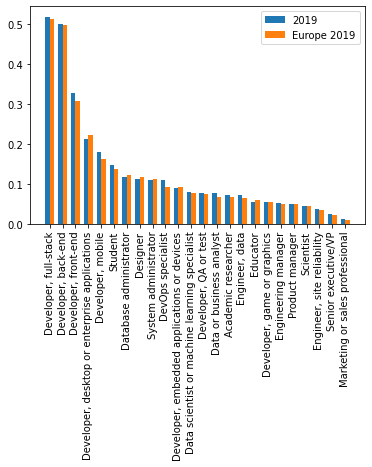

In [356]:
process_and_compare_col_global_local(df_2019, df_2019_eu, "DevType", year=2019, country="Europe")

# Process 2020 Data

In [357]:
df_2020, df_2020_eu, cols_intersect = process_yearly_data(so_survey_results_2020, 2020, 'Europe', cols_intersect)

processing data for year 2020 from ./data/developer_survey_2020/survey_results_public.csv
original data shape:  (64461, 61)
original data shape + year:  (64461, 62)
country specific data shape:  (25201, 62)
old column index:  ['Respondent', 'Country', 'Gender']
old columns index len:  3
new columns index len:  62
new column index:  ['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck

processing yearly data for year 2020 and DevType
null entries for DevType: 15091
droping nulls of the column: DevType
updated null entries for DevType: 0
                                           catval  total_catvals
0                             Developer, back-end          27228
1                           Developer, full-stack          27125
2                            Developer, front-end          18296
3   Developer, desktop or enterprise applications          11784
4                               Developer, mobile           9482
5                               DevOps specialist           5969
6                          Database administrator           5722
7                                        Designer           5321
8                            System administrator           5242
9     Developer, embedded applications or devices           4750
10                       Data or business analyst           4024
11  Data scientist or machine learning specialist           3988
1

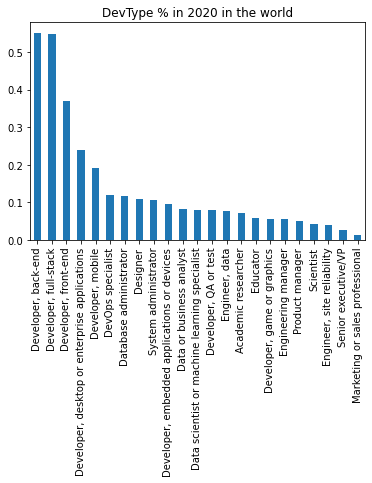

processing yearly data for year 2020 and DevType in Europe
null entries for DevType: 4938
droping nulls of the column: DevType
updated null entries for DevType: 0


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                           catval  total_catvals
0                             Developer, back-end          11425
1                           Developer, full-stack          10749
2                            Developer, front-end           6900
3   Developer, desktop or enterprise applications           4998
4                               Developer, mobile           3378
5                               DevOps specialist           2750
6                            System administrator           2347
7                          Database administrator           2232
8     Developer, embedded applications or devices           2017
9                                        Designer           1758
10                          Developer, QA or test           1578
11  Data scientist or machine learning specialist           1548
12                                 Engineer, data           1486
13                            Academic researcher           1397
14                       

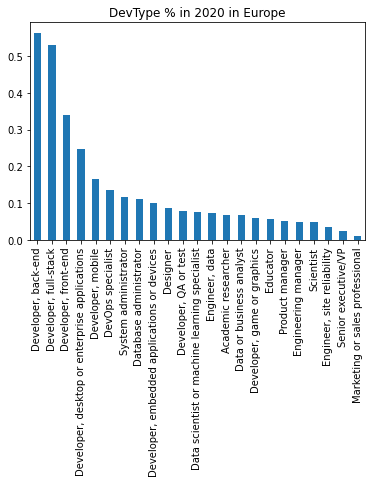

                                           catval      2020  Europe 2020  \
0                             Developer, back-end  0.551509     0.563836   
1                           Developer, full-stack  0.549423     0.530474   
2                            Developer, front-end  0.370589     0.340522   
3   Developer, desktop or enterprise applications  0.238687     0.246656   
4                               Developer, mobile  0.192060     0.166708   
5                               DevOps specialist  0.120903     0.135715   
6                          Database administrator  0.115900     0.115827   
7                                        Designer  0.107778     0.110152   
8                            System administrator  0.106178     0.099541   
9     Developer, embedded applications or devices  0.096212     0.086759   
10                       Data or business analyst  0.081507     0.077876   
11  Data scientist or machine learning specialist  0.080778     0.076395   
12          

(                                           catval  total_catvals
 0                             Developer, back-end          27228
 1                           Developer, full-stack          27125
 2                            Developer, front-end          18296
 3   Developer, desktop or enterprise applications          11784
 4                               Developer, mobile           9482
 5                               DevOps specialist           5969
 6                          Database administrator           5722
 7                                        Designer           5321
 8                            System administrator           5242
 9     Developer, embedded applications or devices           4750
 10                       Data or business analyst           4024
 11  Data scientist or machine learning specialist           3988
 12                          Developer, QA or test           3947
 13                                 Engineer, data           3738
 14       

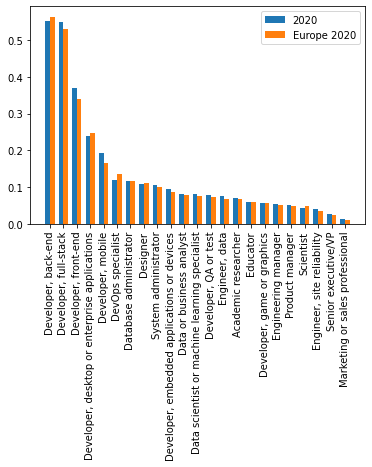

In [358]:
process_and_compare_col_global_local(df_2020, df_2020_eu, "DevType", year=2020, country="Europe")

# Normalize data over past 4 years

In [102]:
#     'Respondent', //kept 2018, 2019, 2020
#     'Professional', // DevType partially 2018, 2019, 2020
#     'ProgramHobby', // Hobby partially 2018, Hobbyist 2019, 2020
#     'Country', //kept 2018, 2019, 2020
#     'EmploymentStatus', //Employment 2018, 2019, 2020
#     'FormalEducation', //kept 2018, EdLevel 2019, 2020
#     'MajorUndergrad', //UndergradMajor overlap 2018, 2019, 2020
#     'YearsProgram', // YearsCoding somehow 2018, YearsCode 2019, 2020
#     'YearsCodedJob', // YearsCodingProf 2018, YearsCodePro 2019, 2020
#     'YearsCodedJobPast', // YearsCodingProf 2018, YearsCodePro 2019, 2020
#     'DeveloperType', // DevType 2018, 2019, 2020
#     'JobSatisfaction', // kept 2018, JobSat 2019, 2020
#     'JobSeekingStatus', // JobSearchStatus 2018, JobSeek 2019, 2020
#     'AssessJobIndustry', // AssessJob1 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobDept', // AssessJob3 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobTech', // AssessJob4 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobCompensation', // AssessJob5 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobOffice', // AssessJob6 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobRemote', // AssessJob7 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobProfDevel', // AssessJob8 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobDiversity', // AssessJob9 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobProduct', // AssessJob10 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'ImportantBenefits', // AssessBenefits1 - 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'Currency', // kept 2018, CurrencySymbol and CurrencyDesc 2019, same 2020
#     'HaveWorkedLanguage', // LanguageWorkedWith 2018, 2019, 2020
#     'WantWorkLanguage', // LanguageDesireNextYear 2018, 2019, 2020
#     'HaveWorkedFramework', // FrameworkWorkedWith 2018, WebFrameWorkedWith 2019, 2020
#     'WantWorkFramework', // FrameworkDesireNextYear 2018, WebFrameDesireNextYear 2019, 2020
#     'HaveWorkedDatabase', // DatabaseWorkedWith 2018, 2019, 2020
#     'WantWorkDatabase', // DatabaseDesireNextYear 2018, 2019, 2020
#     'HaveWorkedPlatform', // PlatformWorkedWith 2018, 2019, 2020
#     'WantWorkPlatform', // PlatformDesireNextYear 2018, 2019, 2020
#     'StackOverflowCommunity', // StackOverflowConsiderMember 2018, SOComm 2019, 2020
#     'Gender', // kept 2018, 2019, 2020
#     'Race', // RaceEthnicity 2018, Ethnicity 2019, 2020
#     'SurveyLong', // SurveyTooLong partially 2018, SurveyLength 2019, 2020
#     'Salary', // kept 2018, CompTotal, CompFreq and/or ConvertedComp 2019, 2020
#     'Year' // kept 2018, 2019, 2020

# df_final = pd.DataFrame(columns=[])
# df_final.shape

In [103]:
print(df_2017_es.shape)
# only keep entries that have a salary as that is what we want to track
df_2017_es_reduced = df_2017_es.dropna(subset=["Salary"], axis=0)
df_2017_es_reduced.shape

(864, 156)


(278, 156)

In [104]:
# check available currencies and normalize the data
df_2017_es_reduced.Currency.value_counts()

Euros (€)                      276
U.S. dollars ($)                 1
British pounds sterling (£)      1
Name: Currency, dtype: int64

In [105]:
df_2017_es_reduced.isnull()['Currency'].mean()

0.0

In [107]:
df_2017_es['Salary_EUR'] = None

# convert non euro salaries to euros. conversion rates USD -> EURO 0,84 ; GBP -> EURO 1,08 for 13.09.2020
def convert_salary(row):
    # print(f"currency:|{row['Currency']}|")
    if row['Currency'] == "Euros (€)":
        return row["Salary"]
    elif row['Currency'] == "U.S. dollars ($)":
        return row["Salary"] * 0.84
    elif row['Currency'] == "British pounds sterling (£)":
        return row["Salary"] * 1.08
    else: # unknown currency
        return None

df_2017_es_reduced['final_Salary_EUR'] = df_2017_es_reduced.apply(lambda row: convert_salary(row), axis=1)

/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [108]:
df_2017_es_reduced.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary,Year,Salary_EUR,final_Salary_EUR
count,278.000000,277.000000,276.000000,131.000000,248.000000,278.000000,0.0,278.0,278.000000,278.000000
mean,26787.611511,7.454874,6.942029,2.748092,8.854839,33563.796705,NaN,2017.0,33544.947784,33544.947784
std,15377.427143,1.611424,2.019066,6.123528,1.050880,16435.043075,NaN,0.0,16412.373925,16412.373925
min,70.000000,0.000000,0.000000,0.000000,4.000000,731.182796,NaN,2017.0,731.182796,731.182796
25%,12537.250000,7.000000,6.000000,1.000000,8.000000,23118.279570,NaN,2017.0,23118.279570,23118.279570
50%,28645.500000,8.000000,7.000000,1.000000,9.000000,32258.064516,NaN,2017.0,32258.064516,32258.064516
75%,40628.250000,8.000000,8.000000,3.000000,10.000000,38709.677419,NaN,2017.0,38709.677419,38709.677419
max,51052.000000,10.000000,10.000000,40.000000,10.000000,134803.225806,NaN,2017.0,134803.225806,134803.225806


In [109]:
df_2017_es_reduced['Professional'].value_counts()

Professional developer    278
Name: Professional, dtype: int64

In [110]:
# it is safe to drop the Professional column as it has only one value for this subset of data
df_2017_es_reduced = df_2017_es_reduced.drop('Professional', axis=1)

In [83]:
df_merged_es = df_2017_es[[]].copy()

# Spain - Case Study

## 1. Evolution of salary over past 5 years in Spain

## 2. Salary predictions for the 2 years in Spain

## 3. Development language impact on salary

## 4. What kind of development work is being done in Spain

## 5. Important development centers in Spain